In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dfx=pd.read_csv("X.csv")
dfy=pd.read_csv("Y.csv")

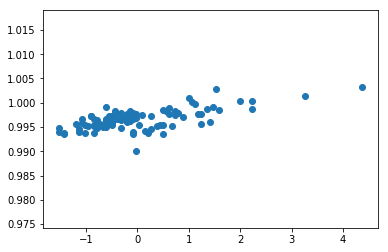

In [20]:
x=dfx.values
y=dfy.values
X=((x-x.mean())/x.std())   #Normalisation
Y=y
3plt.scatter(X,Y)

In [27]:
#Driver Code
def hypothesis(x,theta):
    return(theta[0]+theta[1]*x)         #creating hypothesis according to the rule

def error(X,Y,theta):
    m=X.shape[0]                 #counting the total number of training sets.
    error=0                   #defining error
    for i in range(m):
        hx=hypothesis(X[i],theta)             #creating h(x) for different x acc to the rule
        error+=(hx-Y[i])**2             #calculating error
        
    return(error)

def gradient(X,Y,theta):
    grad=np.zeros((2,))         #creating a gradient array of size to as we have to calculate gradient for theta[0] and theta[1]
    m=X.shape[0]
    for i in range(m):
        hx=hypothesis(X[i],theta)
        grad[0]+=(hx-Y[i])                #updating the value of gradient as per the formula
        grad[1]+=(hx-Y[i])*X[i]
    return(grad)

#Main Algorithm

def gradient_Descent(X,Y,learning_rate=0.001):
    theta=np.zeros((2,))                #creating theta vector and intializing them with zero
    error_list=[]
    for i in range(100):             #taking 100 as maximum iteration for convergence       
        grad=gradient(X,Y,theta)     #evaulating gradient
        e=error(X,Y,theta)
        error_list.append(e)
        theta[0]=theta[0]-learning_rate*grad[0]   #updating the 
        theta[1]=theta[1]-learning_rate*grad[1]
    
    return(theta,error_list)


In [28]:
final_theta,error_list=gradient_Descent(X,Y)

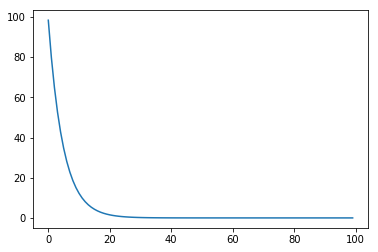

In [29]:
plt.plot(error_list)

In [30]:
print(final_theta)

[0.99660456 0.0013579 ]


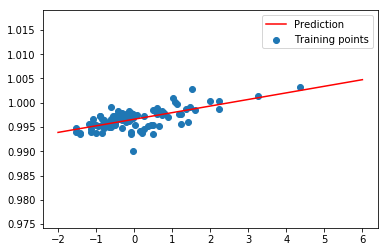

In [31]:
xtest=np.linspace(-2,6,8)
plt.scatter(X,Y,label="Training points")
plt.plot(xtest,hypothesis(xtest,final_theta),color="r",label="Prediction")
plt.legend()
plt.show()